In [81]:
import tensorflow as tf
print(tf.__version__)

2.13.1


In [82]:
import keras
print(keras.__version__)

2.13.1


In [83]:
print(tf.test.is_gpu_available())


False


In [59]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image
import cv2
from zipfile import *
import os
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import ImageDataGenerator
from keras import layers
from keras.metrics import categorical_crossentropy
from keras.models import Model, Sequential, load_model
from keras.layers import Dense, GlobalAveragePooling2D, Dropout, MaxPooling2D, Flatten, Conv2D
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping



In [70]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing import image


In [73]:
train_datagen = ImageDataGenerator (
    rescale=1./255, 
    shear_range=0.2,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    vertical_flip=True,
    brightness_range=[0.8, 1.2],
    horizontal_flip=True
    )

test_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory('D:/emotionDetection/dataset/train', target_size=(48, 48), batch_size=16, class_mode='categorical',color_mode='grayscale')
test_generator = test_datagen.flow_from_directory('D:/emotionDetection/dataset/test', target_size=(48, 48), batch_size=16,color_mode='grayscale', class_mode='categorical')
validation_generator = train_datagen.flow_from_directory('D:/emotionDetection/dataset/val', target_size=(48, 48), color_mode='grayscale', batch_size=16, class_mode='categorical')


Found 726 images belonging to 9 classes.
Found 129 images belonging to 7 classes.


Found 166 images belonging to 7 classes.


In [74]:
train_generator.image_shape 

(48, 48, 1)

In [75]:
train_generator.class_indices 

{'anger': 0,
 'assets': 1,
 'contempt': 2,
 'disgust': 3,
 'fear': 4,
 'happy': 5,
 'sadness': 6,
 'surprise': 7,
 'variables': 8}

In [76]:
model = tf.keras.Sequential([
   tf.keras.layers.Conv2D(16, kernel_size=(3,3), activation='relu', input_shape=(48,48,1)),
   tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
   tf.keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
   tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
   tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
   tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
   tf.keras.layers.Flatten(),
   tf.keras.layers.Dense(64, activation='relu'),
   tf.keras.layers.Dropout(rate=0.5),
   tf.keras.layers.Dense(7, activation='softmax')
])


In [77]:
opt = keras.optimizers.Adam(learning_rate=0.001) 
model.compile(optimizer= 'adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [78]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 46, 46, 16)        160       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 23, 23, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 21, 21, 64)        9280      
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 10, 10, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 8, 8, 64)          36928     
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 4, 4, 64)         

In [79]:
history = model.fit(train_generator, validation_data=validation_generator, epochs=99, batch_size=16,callbacks=[EarlyStopping(monitor='val_loss', patience=7, verbose=0)])


Epoch 1/99


InvalidArgumentError: Graph execution error:

Detected at node 'categorical_crossentropy/softmax_cross_entropy_with_logits' defined at (most recent call last):
    File "c:\Users\Blu-Ray\anaconda3\lib\runpy.py", line 197, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "c:\Users\Blu-Ray\anaconda3\lib\runpy.py", line 87, in _run_code
      exec(code, run_globals)
    File "c:\Users\Blu-Ray\anaconda3\lib\site-packages\ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "c:\Users\Blu-Ray\anaconda3\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
      app.start()
    File "c:\Users\Blu-Ray\anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 712, in start
      self.io_loop.start()
    File "c:\Users\Blu-Ray\anaconda3\lib\site-packages\tornado\platform\asyncio.py", line 199, in start
      self.asyncio_loop.run_forever()
    File "c:\Users\Blu-Ray\anaconda3\lib\asyncio\base_events.py", line 601, in run_forever
      self._run_once()
    File "c:\Users\Blu-Ray\anaconda3\lib\asyncio\base_events.py", line 1905, in _run_once
      handle._run()
    File "c:\Users\Blu-Ray\anaconda3\lib\asyncio\events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "c:\Users\Blu-Ray\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 510, in dispatch_queue
      await self.process_one()
    File "c:\Users\Blu-Ray\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 499, in process_one
      await dispatch(*args)
    File "c:\Users\Blu-Ray\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 406, in dispatch_shell
      await result
    File "c:\Users\Blu-Ray\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 730, in execute_request
      reply_content = await reply_content
    File "c:\Users\Blu-Ray\anaconda3\lib\site-packages\ipykernel\ipkernel.py", line 390, in do_execute
      res = shell.run_cell(code, store_history=store_history, silent=silent)
    File "c:\Users\Blu-Ray\anaconda3\lib\site-packages\ipykernel\zmqshell.py", line 528, in run_cell
      return super().run_cell(*args, **kwargs)
    File "c:\Users\Blu-Ray\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2914, in run_cell
      result = self._run_cell(
    File "c:\Users\Blu-Ray\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2960, in _run_cell
      return runner(coro)
    File "c:\Users\Blu-Ray\anaconda3\lib\site-packages\IPython\core\async_helpers.py", line 78, in _pseudo_sync_runner
      coro.send(None)
    File "c:\Users\Blu-Ray\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3185, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "c:\Users\Blu-Ray\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3377, in run_ast_nodes
      if (await self.run_code(code, result,  async_=asy)):
    File "c:\Users\Blu-Ray\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3457, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "C:\Users\Blu-Ray\AppData\Local\Temp\ipykernel_4600\2063727494.py", line 1, in <module>
      history = model.fit(train_generator, validation_data=validation_generator, epochs=99, batch_size=16,callbacks=[EarlyStopping(monitor='val_loss', patience=7, verbose=0)])
    File "c:\Users\Blu-Ray\anaconda3\lib\site-packages\keras\src\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\Blu-Ray\anaconda3\lib\site-packages\keras\src\engine\training.py", line 1742, in fit
      tmp_logs = self.train_function(iterator)
    File "c:\Users\Blu-Ray\anaconda3\lib\site-packages\keras\src\engine\training.py", line 1338, in train_function
      return step_function(self, iterator)
    File "c:\Users\Blu-Ray\anaconda3\lib\site-packages\keras\src\engine\training.py", line 1322, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\Blu-Ray\anaconda3\lib\site-packages\keras\src\engine\training.py", line 1303, in run_step
      outputs = model.train_step(data)
    File "c:\Users\Blu-Ray\anaconda3\lib\site-packages\keras\src\engine\training.py", line 1081, in train_step
      loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "c:\Users\Blu-Ray\anaconda3\lib\site-packages\keras\src\engine\training.py", line 1139, in compute_loss
      return self.compiled_loss(
    File "c:\Users\Blu-Ray\anaconda3\lib\site-packages\keras\src\engine\compile_utils.py", line 265, in __call__
      loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "c:\Users\Blu-Ray\anaconda3\lib\site-packages\keras\src\losses.py", line 142, in __call__
      losses = call_fn(y_true, y_pred)
    File "c:\Users\Blu-Ray\anaconda3\lib\site-packages\keras\src\losses.py", line 268, in call
      return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "c:\Users\Blu-Ray\anaconda3\lib\site-packages\keras\src\losses.py", line 2122, in categorical_crossentropy
      return backend.categorical_crossentropy(
    File "c:\Users\Blu-Ray\anaconda3\lib\site-packages\keras\src\backend.py", line 5566, in categorical_crossentropy
      return tf.nn.softmax_cross_entropy_with_logits(
Node: 'categorical_crossentropy/softmax_cross_entropy_with_logits'
logits and labels must be broadcastable: logits_size=[16,7] labels_size=[16,9]
	 [[{{node categorical_crossentropy/softmax_cross_entropy_with_logits}}]] [Op:__inference_train_function_27740]

In [ ]:
test_loss, test_acc = model.evaluate(test_generator)
print(f'Test Accuracy: {test_acc}, Test loss: {test_loss}')

9/9 [==============================] - 1s 111ms/step - loss: 1.2356 - accuracy: 0.5426
Test Accuracy: 0.5426356792449951, Test loss: 1.2355626821517944


In [ ]:
model.save('D:/emotionDetection/dataset/train')

INFO:tensorflow:Assets written to: D:/emotionDetection/dataset/train\assets


INFO:tensorflow:Assets written to: D:/emotionDetection/dataset/train\assets


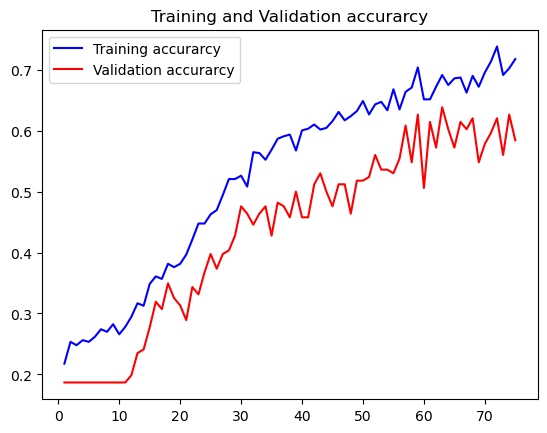

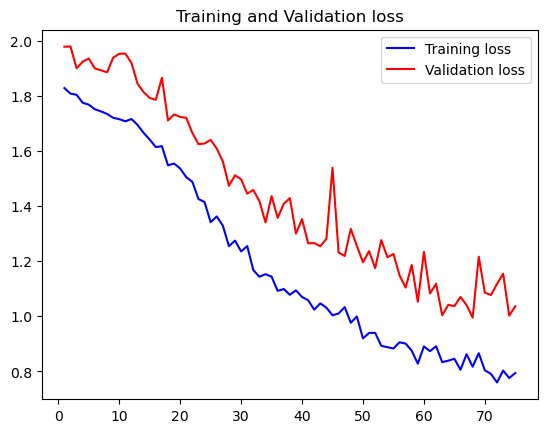

In [ ]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(accuracy) + 1)

plt.plot(epochs, accuracy, 'b', label='Training accurarcy')
plt.plot(epochs, val_accuracy, 'r', label='Validation accurarcy')
plt.title('Training and Validation accurarcy')
plt.legend()

plt.figure()
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()
plt.show()

1/1 [==============================] - 0s 494ms/step


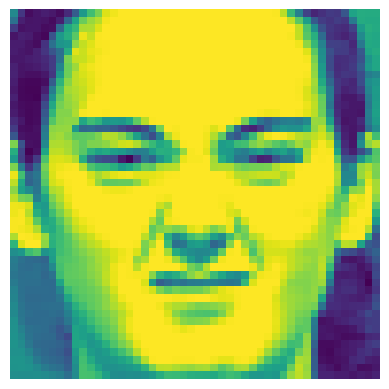

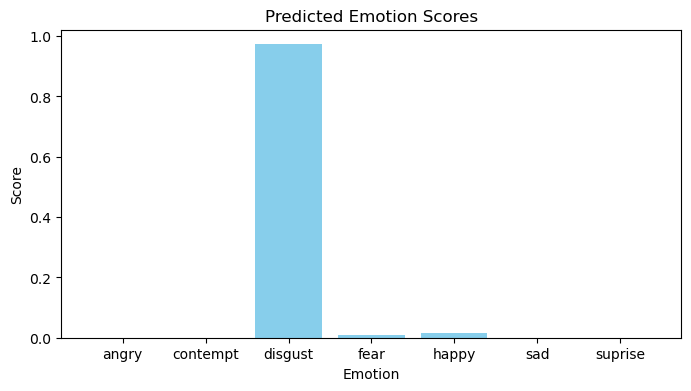

Predicted Emotion: disgust


In [ ]:
model = tf.keras.models.load_model('D:/emotionDetection/dataset/train')

img_path = 'D:/emotionDetection/dataset/train/disgust/S035_005_00000019.png'
img = image.load_img(img_path, target_size=(48, 48), color_mode='grayscale')
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = img_array / 255.0  

predictions = model.predict(img_array)

emotion_labels = ['angry', 'contempt', 'disgust', 'fear', 'happy', 'sad', 'suprise']

plt.imshow(img)
plt.axis('off')
plt.show()

plt.figure(figsize=(8, 4))
plt.bar(emotion_labels, predictions[0], color='skyblue')
plt.title('Predicted Emotion Scores')
plt.xlabel('Emotion')
plt.ylabel('Score')
plt.show()

predicted_class_index = np.argmax(predictions)
predicted_emotion = emotion_labels[predicted_class_index]
print(f"Predicted Emotion: {predicted_emotion}")